<a href="https://colab.research.google.com/github/SaiNaidu-namala/Cipher-Schools/blob/main/Lecture_37_project2_Basic_of_Image_Processing_and_ComputerVision_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python scikit-learn matplotlib numpy

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Display the shape of the data and labels
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


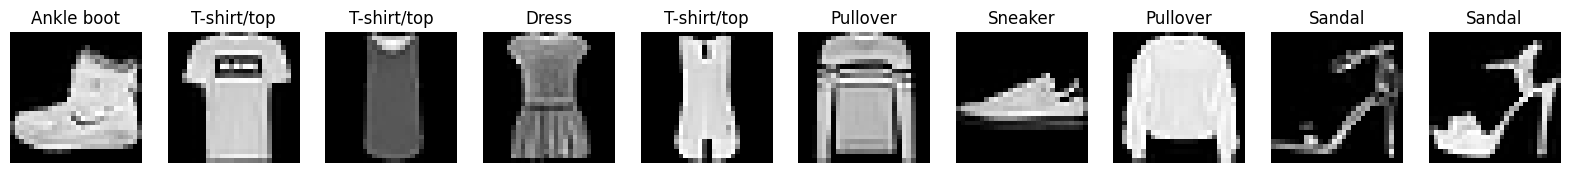

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_initial_images(images, labels, class_names):
    fig, axes = plt.subplots(1, 10, figsize=(20, 3))
    for i in range(10):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')
        ax.set_title(class_names[labels[i]])
        ax.axis('off')
    plt.show()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some initial images with their labels
plot_initial_images(X_train, y_train, class_names)

In [ ]:
# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to add a channel dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Display the shape of the processed images
print(f"Processed training data shape: {X_train.shape}")
print(f"Processed testing data shape: {X_test.shape}")

Processed training data shape: (60000, 28, 28, 1)
Processed testing data shape: (10000, 28, 28, 1)


In [ ]:
import cv2
from skimage.feature import hog

def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Extract HOG features
        features = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=False, multichannel=True)
        hog_features.append(features)
    return np.array(hog_features)

# Extract HOG features from the training and testing images
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# Display the shape of the HOG features
print(f"HOG features training data shape: {X_train_hog.shape}")
print(f"HOG features testing data shape: {X_test_hog.shape}")

<ipython-input-5-08330bc128a6>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=False, multichannel=True)


HOG features training data shape: (60000, 1296)
HOG features testing data shape: (10000, 1296)


In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC(kernel='linear')

# Train the classifier
svm.fit(X_train_hog, y_train)

# Display the training accuracy
train_accuracy = svm.score(X_train_hog, y_train)
print(f"Training accuracy: {train_accuracy * 100:.2f}%")

In [ ]:
# Evaluate the model on the testing set
test_accuracy = svm.score(X_test_hog, y_test)
print(f"Testing accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
# Get predictions on the test set
y_pred = svm.predict(X_test_hog)

# Function to plot images with true and predicted labels
def plot_output_images(images, true_labels, predicted_labels, class_names):
    fig, axes = plt.subplots(1, 10, figsize=(20, 3))
    for i in range(10):
        ax = axes[i]
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}", fontsize=10)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# Plot some test images along with their true and predicted labels
plot_output_images(X_test[:10], y_test[:10], y_pred[:10], class_names)